# **Summer Olympics Data Analysis**

**Created By :**
**Shubham Jasveer Singh Chaudhary**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('summer.csv')
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### 1. In how many cities Summer Olympics is held so far?

In [3]:
print("List of Cities which held Summer Olympics:")
for city in df['City'].unique():
  print(city)

no_of_cities = len(df['City'].unique())
print("\nSummer Olympics has been held in", no_of_cities, "cities so far.")

List of Cities which held Summer Olympics:
Athens
Paris
St Louis
London
Stockholm
Antwerp
Amsterdam
Los Angeles
Berlin
Helsinki
Melbourne / Stockholm
Rome
Tokyo
Mexico
Munich
Montreal
Moscow
Seoul
Barcelona
Atlanta
Sydney
Beijing

Summer Olympics has been held in 22 cities so far.


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [4]:
medals_grp = df.groupby('Medal')         # Group by medals (Gold, Silver, Bronze)
df_gold = medals_grp.get_group('Gold')   # Consider only group of Gold medalists

data_2 = []

for sport in df['Sport'].unique():
    data_2.append([sport, len(df_gold[df_gold['Sport'] == sport])])

data_2 = pd.DataFrame(data_2, columns = ['Sport', 'Gold Medals'])
data_2.sort_values(by = 'Gold Medals', ascending = False, inplace = True)

data_2.head()

,Sport,Gold Medals
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


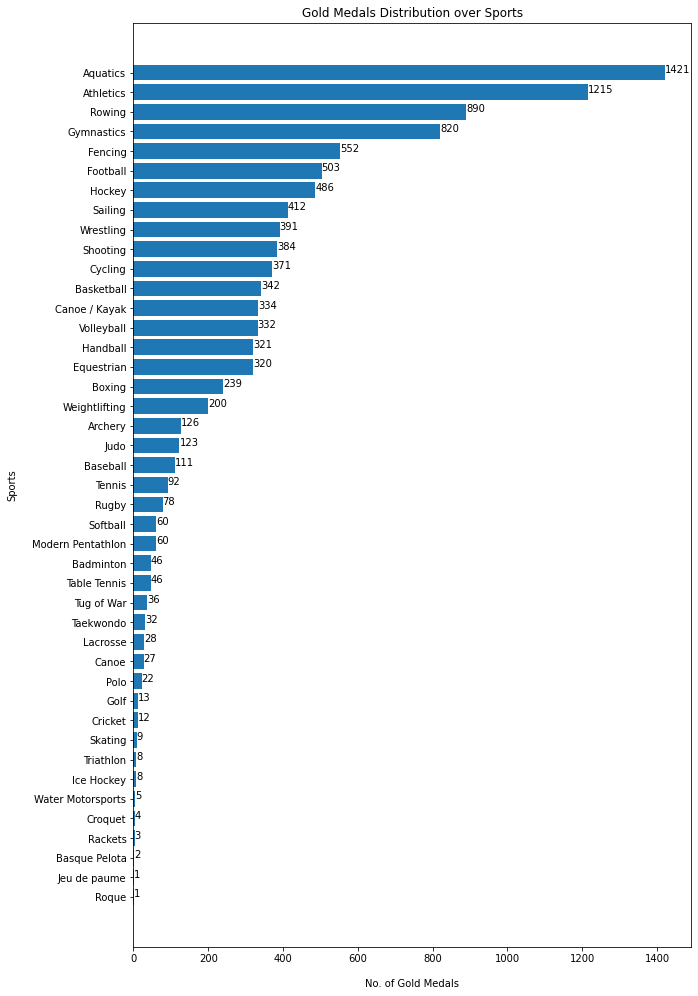

In [5]:
# Note : We need to set ascending as True as to plot horizontal bar graph with 
#        max. no. of gold medals at top of graph
data_2.sort_values(by = 'Gold Medals', ascending = True, inplace = True)  

sports = data_2['Sport'].astype(str)
gold_medals = data_2['Gold Medals'].astype(int)

plt.figure(figsize = (10,17))
plt.barh(sports, gold_medals)
plt.ylabel("Sports", labelpad = 15)
plt.xlabel("No. of Gold Medals", labelpad = 15)
plt.title("Gold Medals Distribution over Sports")

# Print no. of gold medals in front of bar graph of each sport
for index, value in enumerate(gold_medals):
  plt.text(value, index, str(value))

plt.show()

### 3. Which sport is having most number of medals so far? (Top 5)

In [6]:
# Below code snippet is based on the assumption that no sport has 0 medal.
data_3 = []
for sport in df['Sport'].unique():
    data_3.append([sport, len(df[df['Sport'] == sport])])

data_3 = pd.DataFrame(data_3, columns = ['Sport', 'Total Medals'])
data_3.sort_values(by = 'Total Medals', ascending = False, inplace = True)

data_3.head()

,Sport,Total Medals
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


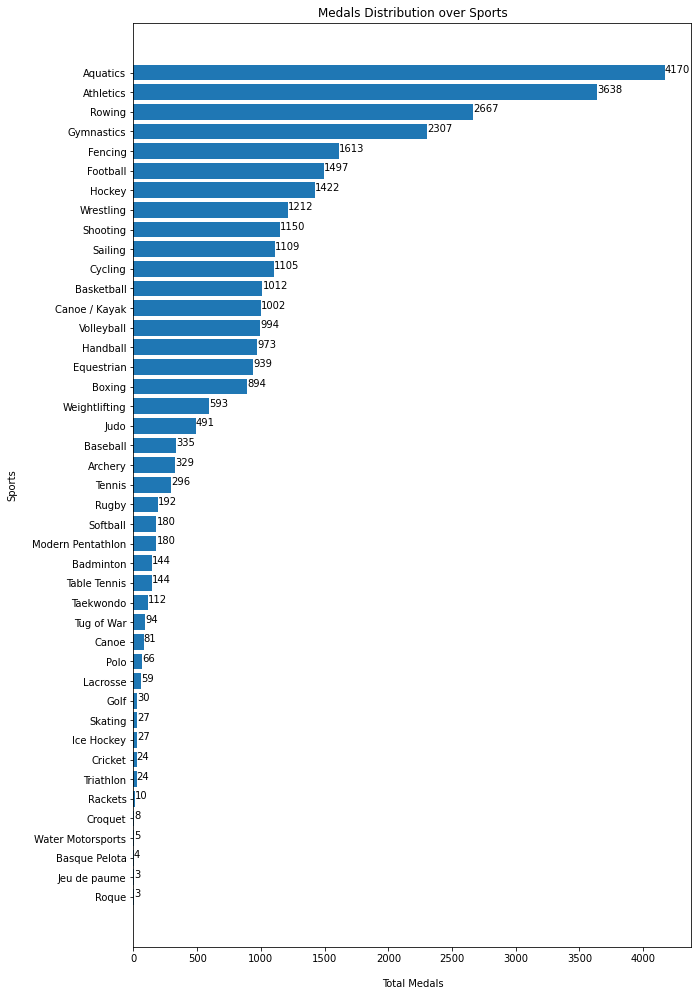

In [7]:
# Note : We need to set ascending as True as to plot horizontal bar graph with 
#        max. medals at top of graph
data_3.sort_values(by = 'Total Medals', ascending = True, inplace = True)  

sports = data_3['Sport'].astype(str)
medals = data_3['Total Medals'].astype(int)

plt.figure(figsize = (10,17))
plt.barh(sports, medals)
plt.ylabel("Sports", labelpad = 15)
plt.xlabel("Total Medals", labelpad = 15)
plt.title("Medals Distribution over Sports")

for index, value in enumerate(medals):
  plt.text(value, index, str(value))

plt.show()

### 4. Which player has won most number of medals? (Top 5)

In [8]:
# Snippet takes some time to execute as dataset has to sort large size (approx. 22000 unique athletes)
data_4 = []
for athlete in df['Athlete'].unique():
    data_4.append([athlete, len(df[df['Athlete'] == athlete])])

data_4 = pd.DataFrame(data_4, columns = ['Athlete', 'Medals'])
data_4.sort_values(by = 'Medals', ascending = False, inplace = True)

data_4.head()

,Athlete,Medals
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


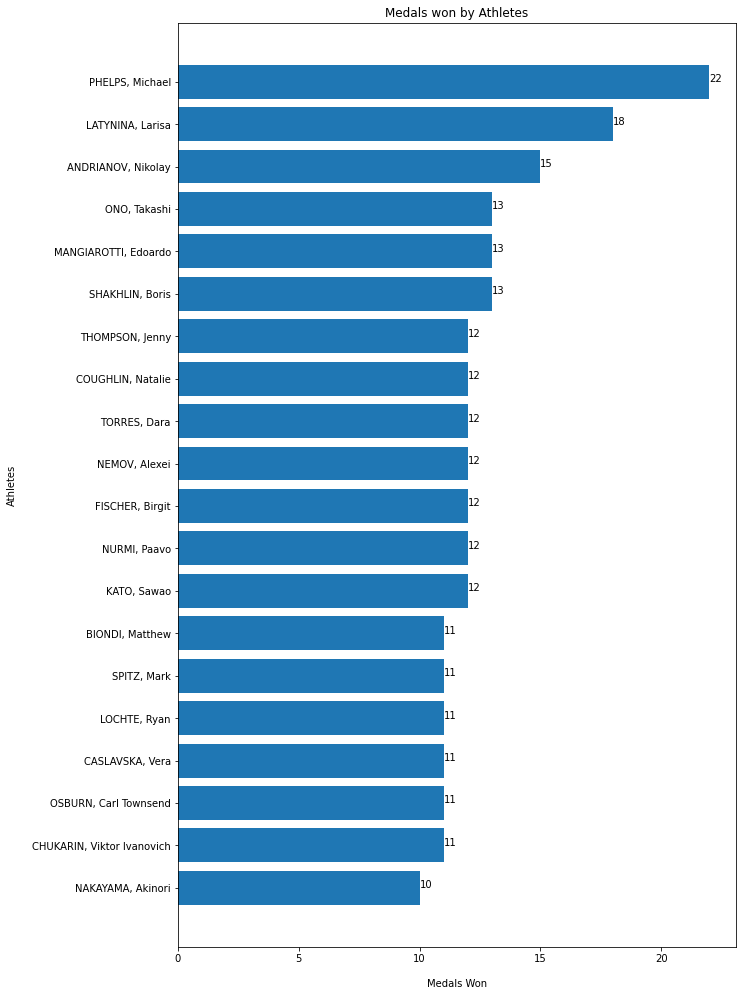

In [9]:
# Note : We need to set ascending as True as to plot horizontal bar graph with 
#        max. medals at top of graph

# Considering only top 20 athletes as large number of athletes are present
top_20_data = data_4.head(20)
top_20_data.sort_values(by = 'Medals', ascending = True, inplace = True)  

athletes = top_20_data['Athlete'].astype(str)
medals = top_20_data['Medals'].astype(int)

plt.figure(figsize = (10,17))
plt.barh(athletes, medals)
plt.ylabel("Athletes", labelpad = 15)
plt.xlabel("Medals Won", labelpad = 15)
plt.title("Medals won by Athletes")

for index, value in enumerate(medals):
  plt.text(value, index, str(value))

plt.show()


### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [10]:
medals_grp = df.groupby('Medal')         # Group by medals (Gold, Silver, Bronze)
df_gold = medals_grp.get_group('Gold')   # Consider only group of Gold medals

data_5 = []

# df_gold['Athlete'].unique() will not include athletes with no gold medals (thus
# improving execution speed).
# To also include athletes with no gold medals, use 'df' instead of 'df_gold'.
for athlete in df_gold['Athlete'].unique():
  data_5.append([athlete, len(df_gold[df_gold['Athlete'] == athlete])])

data_5 = pd.DataFrame(data_5, columns = ['Athlete', 'Gold Medals'])
data_5.sort_values(by = 'Gold Medals', ascending = False, inplace = True)

data_5.head()

,Athlete,Gold Medals
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


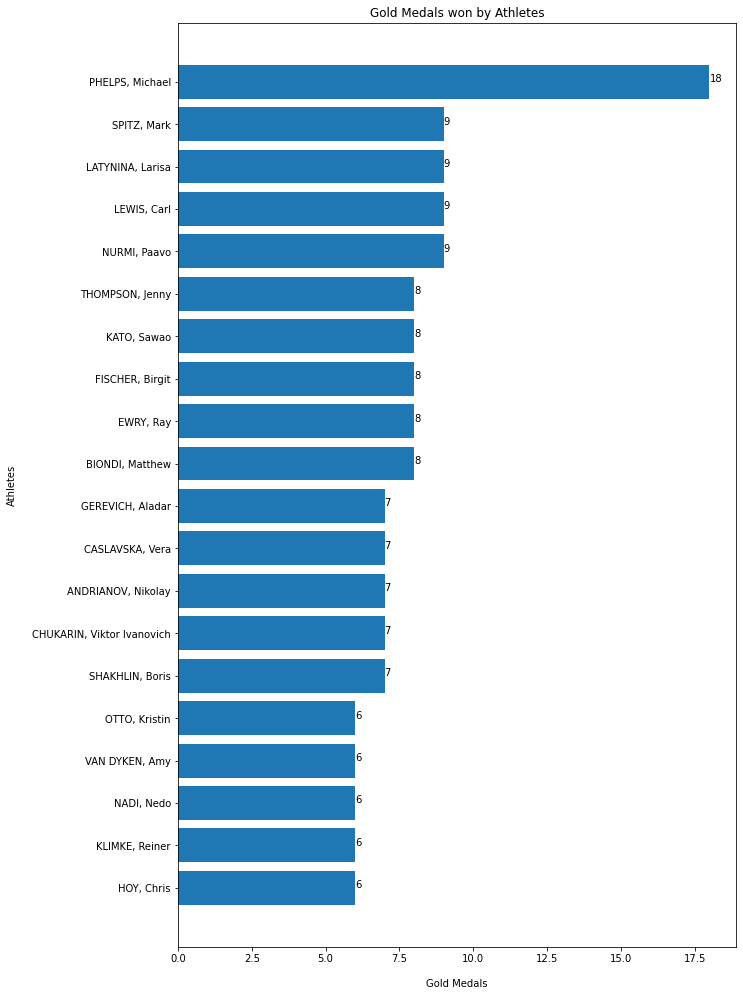

In [11]:
# Note : We need to set ascending as True as to plot horizontal bar graph with 
#        max. gold medals at top of graph

# Considering only top 20 athletes as large number of athletes are present
top_20_data = data_5.head(20)
top_20_data.sort_values(by = 'Gold Medals', ascending = True, inplace = True)  

athlete = top_20_data['Athlete'].astype(str)
medals = top_20_data['Gold Medals'].astype(int)

plt.figure(figsize = (10,17))
plt.barh(athlete, medals)
plt.ylabel("Athletes", labelpad = 15)
plt.xlabel("Gold Medals", labelpad = 15)
plt.title("Gold Medals won by Athletes")

for index, value in enumerate(medals):
  plt.text(value, index, str(value))

plt.show()

### 6. In which year India won first Gold Medal in Summer Olympics?

In [12]:
medals_grp = df.groupby('Medal')        # Group by medals (Gold, Silver, Bronze)
df_gold = medals_grp.get_group('Gold')  # Consider only group of Gold medals

# df_ind is the dataframe containing medal = Gold and country = IND
df_ind = df_gold[df_gold['Country'] == 'IND']  
year = min(df_ind['Year'])

print("India won its first gold medal in", year)

India won its first gold medal in 1928


### 7. Which event is most popular in terms on number of players? (Top 5)

In [13]:
# The snippet below is based on assumption that an athlete can participate in
# more than 1 sport in same event and so, we need to consider only unique players
# in same event.
events_grp = df.groupby('Event')

data_7 = []
for event in df['Event'].unique():
  df_event = events_grp.get_group(event)
  data_7.append([event, len(df_event['Athlete'].unique())])

data_7 = pd.DataFrame(data_7, columns = ['Event', 'No. of Players'])
data_7.sort_values(by = 'No. of Players', ascending = False, inplace = True)

data_7.head()

,Event,No. of Players
80,Football,1357
176,Hockey,1154
138,Team Competition,975
83,Eight With Coxswain (8+),828
327,Basketball,814


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


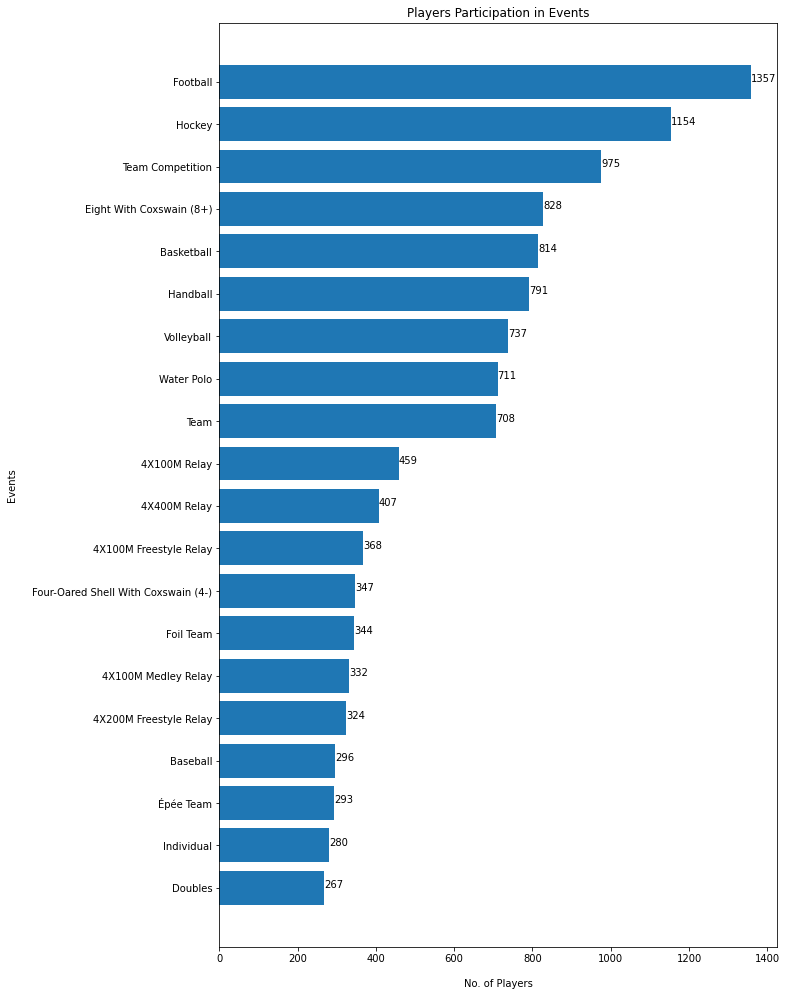

In [14]:
# Note : We need to set ascending as True as to plot horizontal bar graph with 
#        max. no. of players at top of graph

# Considering only top 20 events as large number of events (666) are there
top_20_data = data_7.head(20)
top_20_data.sort_values(by = 'No. of Players', ascending = True, inplace = True)  

events = top_20_data['Event'].astype(str)
players_num = top_20_data['No. of Players'].astype(int)

plt.figure(figsize = (10,17))
plt.barh(events, players_num)
plt.ylabel("Events", labelpad = 15)
plt.xlabel("No. of Players", labelpad = 15)
plt.title("Players Participation in Events")

for index, value in enumerate(players_num):
  plt.text(value, index, str(value))

plt.show()

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [15]:
medals_grp = df.groupby('Medal')         # Group by medals (Gold, Silver, Bronze)
df_gold = medals_grp.get_group('Gold')   # Consider only group of Gold medals

# Considering only group of female gold medalists
# First, grouping by 'Gender' and then getting Women's group
df_women = df_gold.groupby('Gender').get_group('Women')

data_8 = []

# df['Sport'].unique() includes all sports (even those in which no women won gold medal)
for sport in df['Sport'].unique():
  data_8.append([sport, len(df_women[df_women['Sport'] == sport])])

data_8 = pd.DataFrame(data_8, columns = ['Sport', 'No. of Players'])
data_8.sort_values(by = 'No. of Players', ascending = False, inplace = True)

data_8.head()

,Sport,No. of Players
0,Aquatics,589
1,Athletics,389
4,Gymnastics,268
17,Rowing,217
35,Volleyball,166


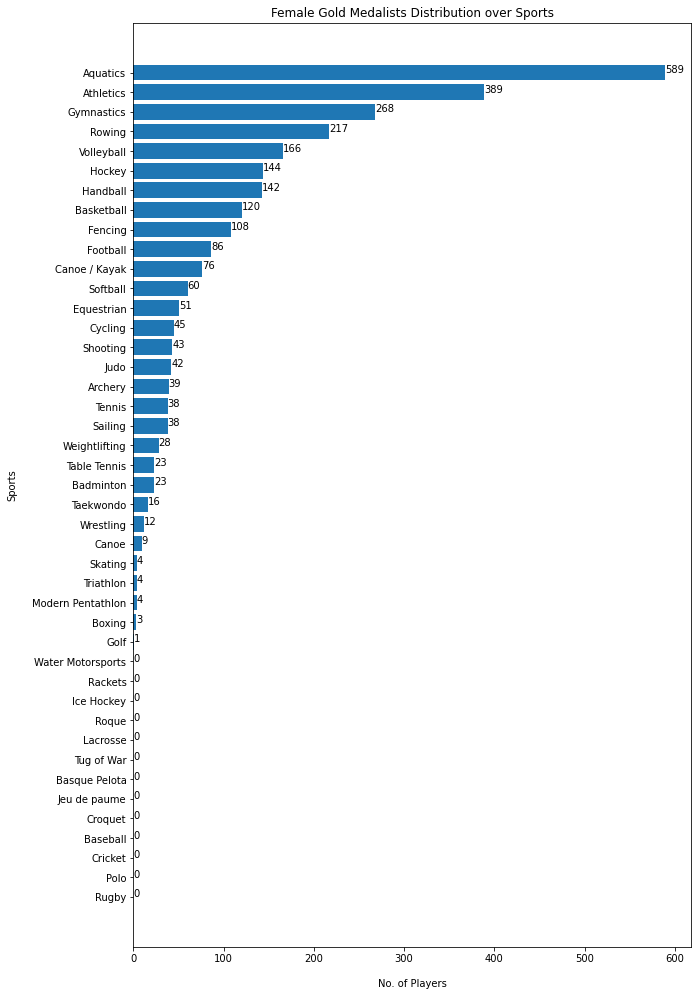

In [16]:
# Note : We need to set ascending as True as to plot horizontal bar graph with 
#        max. no. of female gold medalists at top of graph

data_8.sort_values(by = 'No. of Players', ascending = True, inplace = True)  

sports = data_8['Sport'].astype(str)
players_num = data_8['No. of Players'].astype(int)

plt.figure(figsize = (10,17))
plt.barh(sports, players_num)
plt.ylabel("Sports", labelpad = 15)
plt.xlabel("No. of Players", labelpad = 15)
plt.title("Female Gold Medalists Distribution over Sports")

for index, value in enumerate(players_num):
  plt.text(value, index, str(value))

plt.show()